In [343]:
import qdpm
import numpy as np
import matplotlib.pyplot as plt
from qutip import identity, Qobj, tensor, basis, ket2dm, expect, sigmaz
from qutip.qip.operations import rx, ry, cphase, rz
from itertools import product
import pickle
from scipy.optimize import curve_fit

In [325]:
RB = qdpm.Experiment(r"O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\RB\00--10\2021_02_02_22_17_35")
RB_long = qdpm.Experiment(r"O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\RB\00--10\2021_02_03_03_23_54_long")

In [326]:
l, G, R_index, P_index = pickle.load(open("O:\\68707\\Tongyu Zhao\\Codes\\Python\\Randomized Benchmarking\\RB_index_2021_02_02_22_12_38.p", "rb"))

In [327]:
eigenstates_full = pickle.load(open(r"O:\68707\Tongyu Zhao\Codes\Python\Randomized Benchmarking\eigenstates_2021_02_02_22_12_38.p", "rb"))

In [328]:
l = np.array(l)
l

array([ 2,  4,  6,  8, 10, 12, 16, 20, 24, 28, 32, 36])

In [329]:
l_long = np.array(l_long)
l_long

array([24, 36])

In [330]:
N_l = len(l)
# N_l_long = len(l_long)
N_l_short = 8
N_l_long = 4
N_G = 4
N_P = 6
N_e = 1000

In [331]:
qubit_idx = 0

In [332]:
clf_short = qdpm.TwoQubitClassifier(RB)
prediction_short = clf_short.predict()
population_short = np.floor(prediction_short/2).mean(axis=1)

In [333]:
population_short = population_short.reshape((N_G, N_P, N_l_short))

In [334]:
clf_long = qdpm.TwoQubitClassifier(RB_long)
prediction_long = clf_long.predict()
population_long = np.floor(prediction_long/2).mean(axis=1)

In [335]:
population_long = population_long.reshape((N_G, N_P, N_l_long))

In [336]:
population = np.concatenate((population_short, population_long), axis=2)

In [337]:
expectation = expect((1-sigmaz())/2, eigenstates_full).reshape((N_G, N_P, N_l)).astype("int")

In [338]:
fidelity = np.zeros(population.shape)
for j, m, n in product(range(N_G), range(N_P), range(N_l)):
    if expectation[j, m, n] == 0:
        fidelity[j, m, n] = 1-population[j, m, n]
    else:
        fidelity[j, m, n] = population[j, m, n]

In [340]:
def prob(l, d, d_if):
    return (1-(1-d_if)*(1-d)**l)/2

In [341]:
popt, pcov = curve_fit(prob, l, fidelity.mean(axis=0).mean(axis=0), p0=[0.1, 0])

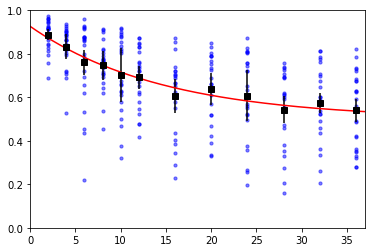

In [342]:
fig, ax = plt.subplots()
for j, m in product(range(N_G), range(N_P)):
    ax.scatter(l, fidelity[j, m, :], s=10, color="b", marker="o", alpha=0.5)
    # ax.scatter(l_long, fidelity_long[j, m, :], c="k", marker="o")
ax.errorbar(l, fidelity.mean(axis=0).mean(axis=0), yerr=fidelity.mean(axis=0).std(axis=0), fmt="s", c="k")
ax.plot(np.linspace(0, 37, 201), prob(np.linspace(0, 37, 201), *popt), c="r")

# ax.scatter(l_long, fidelity_long.mean(axis=0).mean(axis=0), c="b")
ax.set_ylim(0, 1)
ax.set_xlim(0, 37)
plt.show()

In [344]:
1-popt[0]/2

0.9671055886561628

# 00 -- 01

In [345]:
RB = qdpm.Experiment(r"O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\RB\00--01\2021_02_03_14_21_59")
RB_long = qdpm.Experiment(r"O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\RB\00--01\2021_02_04_14_35_08")

In [346]:
l, G, R_index, P_index = pickle.load(open("O:\\68707\\Tongyu Zhao\\Codes\\Python\\Randomized Benchmarking\\RB_index_2021_02_02_22_12_38.p", "rb"))

In [347]:
eigenstates_full = pickle.load(open(r"O:\68707\Tongyu Zhao\Codes\Python\Randomized Benchmarking\eigenstates_2021_02_02_22_12_38.p", "rb"))

In [348]:
l = np.array(l)
l

array([ 2,  4,  6,  8, 10, 12, 16, 20, 24, 28, 32, 36])

In [349]:
l_long = np.array(l_long)
l_long

array([24, 36])

In [350]:
N_l = len(l)
# N_l_long = len(l_long)
N_l_short = 8
N_l_long = 4
N_G = 4
N_P = 6
N_e = 1000

In [351]:
clf_short = qdpm.TwoQubitClassifier(RB)
prediction_short = clf_short.predict()
population_short = (prediction_short % 2).mean(axis=1)

In [352]:
population_short = population_short.reshape((N_G, N_P, N_l_short))

In [353]:
clf_long = qdpm.TwoQubitClassifier(RB_long)
prediction_long = clf_long.predict()
population_long = (prediction_long % 2).mean(axis=1)

In [354]:
population_long = population_long.reshape((N_G, N_P, N_l_long))

In [355]:
population = np.concatenate((population_short, population_long), axis=2)

In [356]:
expectation = expect((1-sigmaz())/2, eigenstates_full).reshape((N_G, N_P, N_l)).astype("int")

In [357]:
fidelity = np.zeros(population.shape)
for j, m, n in product(range(N_G), range(N_P), range(N_l)):
    if expectation[j, m, n] == 0:
        fidelity[j, m, n] = 1-population[j, m, n]
    else:
        fidelity[j, m, n] = population[j, m, n]

In [358]:
popt, pcov = curve_fit(prob, l, fidelity.mean(axis=0).mean(axis=0), p0=[0.1, 0])

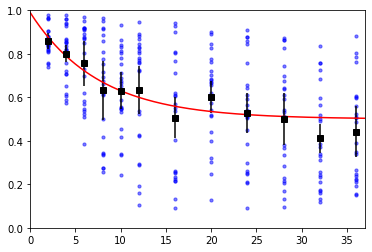

In [359]:
fig, ax = plt.subplots()
for j, m in product(range(N_G), range(N_P)):
    ax.scatter(l, fidelity[j, m, :], s=10, color="b", marker="o", alpha=0.5)
ax.errorbar(l, fidelity.mean(axis=0).mean(axis=0), yerr=fidelity.mean(axis=0).std(axis=0), fmt="s", c="k")
ax.plot(np.linspace(0, 37, 201), prob(np.linspace(0, 37, 201), *popt), c="r")
ax.set_ylim(0, 1)
ax.set_xlim(0, 37)
plt.show()

In [360]:
1-popt[0]/2

0.9380202962297065

# 01 -- 11

In [361]:
RB = qdpm.Experiment(r"O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\RB\01--11\2021_02_04_18_42_29")
RB_long = qdpm.Experiment(r"O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\RB\01--11\2021_02_04_21_05_32")

In [362]:
l, G, R_index, P_index = pickle.load(open("O:\\68707\\Tongyu Zhao\\Codes\\Python\\Randomized Benchmarking\\RB_index_2021_02_02_22_12_38.p", "rb"))

In [363]:
eigenstates_full = pickle.load(open(r"O:\68707\Tongyu Zhao\Codes\Python\Randomized Benchmarking\eigenstates_2021_02_02_22_12_38.p", "rb"))

In [364]:
l = np.array(l)
l

array([ 2,  4,  6,  8, 10, 12, 16, 20, 24, 28, 32, 36])

In [365]:
N_l = len(l)
# N_l_long = len(l_long)
N_l_short = 8
N_l_long = 4
N_G = 4
N_P = 6
N_e = 1000

In [366]:
clf_short = qdpm.TwoQubitClassifier(RB)
prediction_short = clf_short.predict()
population_short = np.floor(prediction_short/2).mean(axis=1)

In [367]:
population_short = population_short.reshape((N_G, N_P, N_l_short))

In [368]:
clf_long = qdpm.TwoQubitClassifier(RB_long)
prediction_long = clf_long.predict()
population_long = np.floor(prediction_long/2).mean(axis=1)

In [369]:
population_long = population_long.reshape((N_G, N_P, N_l_long))

In [370]:
population = np.concatenate((population_short, population_long), axis=2)

In [371]:
expectation = expect((1-sigmaz())/2, eigenstates_full).reshape((N_G, N_P, N_l)).astype("int")

In [372]:
fidelity = np.zeros(population.shape)
for j, m, n in product(range(N_G), range(N_P), range(N_l)):
    if expectation[j, m, n] == 0:
        fidelity[j, m, n] = 1-population[j, m, n]
    else:
        fidelity[j, m, n] = population[j, m, n]

In [373]:
popt, pcov = curve_fit(prob, l, fidelity.mean(axis=0).mean(axis=0), p0=[0.1, 0])

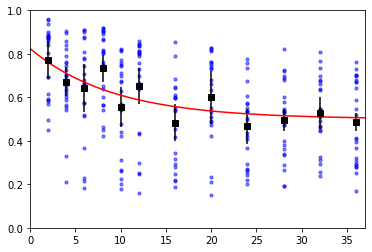

In [374]:
fig, ax = plt.subplots()
for j, m in product(range(N_G), range(N_P)):
    ax.scatter(l, fidelity[j, m, :], s=10, color="b", marker="o", alpha=0.5)
ax.errorbar(l, fidelity.mean(axis=0).mean(axis=0), yerr=fidelity.mean(axis=0).std(axis=0), fmt="s", c="k")
ax.plot(np.linspace(0, 37, 201), prob(np.linspace(0, 37, 201), *popt), c="r")
ax.set_ylim(0, 1)
ax.set_xlim(0, 37)
plt.show()

In [375]:
1-popt[0]/2

0.948708593112478